#Trabalhando com Planilhas do Excel

## Intro

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel("/content/Aracaju.xlsx")
df2 = pd.read_excel("/content/Fortaleza.xlsx")
df3 = pd.read_excel("/content/Natal.xlsx")
df4 = pd.read_excel("/content/Recife.xlsx")
df5 = pd.read_excel("/content/Salvador.xlsx")

In [3]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [4]:
df = pd.concat([df1,df2,df3,df4,df5])

In [5]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [7]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
151,Natal,2019-01-02,14.63,1035,1
50,Fortaleza,2019-01-01,33.69,1005,3
100,Fortaleza,2019-01-01,18.58,1003,1
125,Natal,2019-01-02,25.00,1037,2
116,Natal,2019-01-02,41.78,1034,3


In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [9]:
df["LojaID"] = df["LojaID"].astype("object")

In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [11]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True) # inplace serve para substituir em memória

In [13]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
170,Salvador,2019-01-02,9.26,1035,3
227,Natal,2019-01-02,14.70,1035,1
22,Recife,2019-01-01,39.53,983,3
27,Fortaleza,2019-01-01,212.37,1003,6
56,Aracaju,2018-01-01,41.90,1523,6
42,Aracaju,2018-01-01,40.00,1520,8
200,Natal,2019-01-02,41.06,1035,1
98,Aracaju,2018-01-01,138.33,1521,10
204,Salvador,2019-01-02,151.41,1037,2
63,Fortaleza,2019-01-01,118.17,1004,1


In [15]:
#Substituindo valores nulos por zero
df["Vendas"].fillna(0, inplace=True) 

In [16]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [17]:
#Apagando as linhas comm valores nulos com base apenas em uma coluna
df.dropna(subset=["Vendas"], inplace=True)

In [18]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

## Criando colunas novas

In [19]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [20]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [21]:
#Para achar a quantidade (caso não houvesse)
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [22]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [23]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [24]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [25]:
#nlargest (maiores receitas)
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [26]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [27]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


## Trabalhando com datas

In [28]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].view("int64")

In [29]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [30]:
#Transformando coluna Data em Date
df["Data"] = pd.to_datetime(df["Data"])

In [31]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [32]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [33]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [34]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
57,Natal,2019-02-24,425.00,854,4,1700.00,4.0,2019
25,Salvador,2019-01-01,220.62,1035,1,220.62,1.0,2019
93,Recife,2019-01-01,17.45,980,6,104.70,6.0,2019
124,Recife,2019-03-02,47.98,983,7,335.86,7.0,2019
63,Natal,2018-02-12,552.00,852,2,1104.00,2.0,2018


In [35]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [36]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
112,Natal,2019-01-02,43.00,1036,3,129.00,3.0,2019,1,2
68,Natal,2018-06-22,274.00,852,3,822.00,3.0,2018,6,22
97,Salvador,2019-01-01,39.91,1037,3,119.73,3.0,2019,1,1
63,Recife,2019-01-01,37.95,980,2,75.90,2.0,2019,1,1
66,Recife,2019-01-01,14.59,983,7,102.13,7.0,2019,1,1


In [37]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [38]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [39]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days
108,Aracaju,2018-01-01,31.94,1520,8,255.52,8.0,2018,1,1,0 days
5,Fortaleza,2019-01-01,37.30,1002,5,186.50,5.0,2019,1,1,365 days
41,Fortaleza,2019-02-13,191.29,1002,3,573.87,3.0,2019,2,13,408 days
23,Salvador,2019-01-01,193.20,1036,3,579.60,3.0,2019,1,1,365 days


In [40]:
#Criando a coluna de trimestre
df["semestre_venda"] = df["Data"].dt.quarter

In [41]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
86,Aracaju,2018-01-01,154.92,1521,5,774.60,5.0,2018,1,1,0 days,1
219,Natal,2019-01-02,19.67,1037,2,39.34,2.0,2019,1,2,366 days,1
25,Recife,2019-01-01,161.60,982,5,808.00,5.0,2019,1,1,365 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1


In [42]:
#Filtrando vendas de março de 2019
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [43]:
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
131,Fortaleza,2019-03-02,139.07,982,6,834.42,6.0,2019,3,2,425 days,1
114,Salvador,2019-03-02,25.52,1034,1,25.52,1.0,2019,3,2,425 days,1
118,Recife,2019-03-02,17.70,981,5,88.50,5.0,2019,3,2,425 days,1
66,Natal,2019-03-24,559.00,853,2,1118.00,2.0,2019,3,24,447 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1
134,Fortaleza,2019-03-02,195.18,980,5,975.90,5.0,2019,3,2,425 days,1
133,Salvador,2019-03-02,153.71,1035,1,153.71,1.0,2019,3,2,425 days,1
74,Natal,2019-03-10,303.00,854,3,909.00,3.0,2019,3,10,433 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
117,Recife,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1


## Visualização de dados

In [44]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

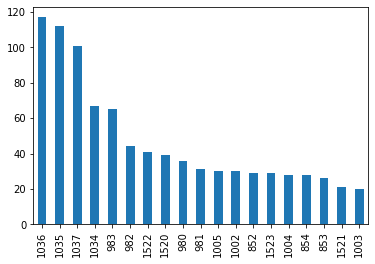

In [45]:
#Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

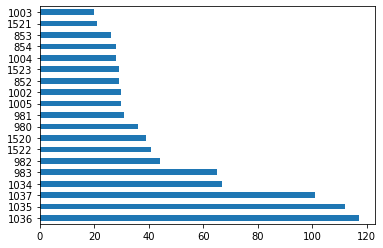

In [46]:
#Grafico de barras horizontais
df["LojaID"].value_counts().plot.barh(); # o ";" define se é ascending ou descending

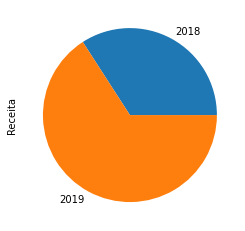

In [47]:
#Gráfico de pizza (torta)
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [48]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de Vendas')

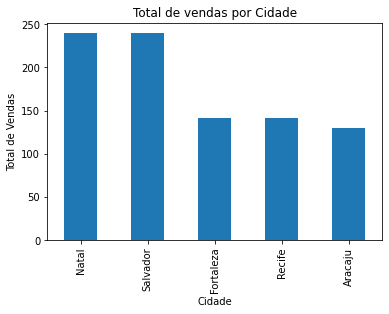

In [51]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

Text(0, 0.5, 'Total de Vendas')

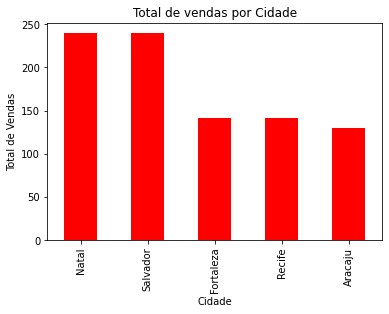

In [54]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas")

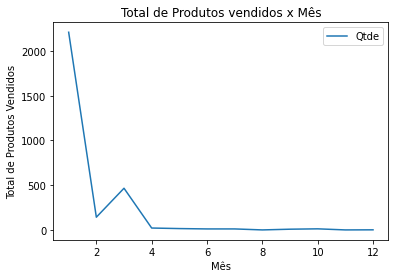

In [57]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total de Produtos vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total de Produtos Vendidos");
plt.legend()

In [58]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [59]:
#Selecionando apenas as vendas em 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [63]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

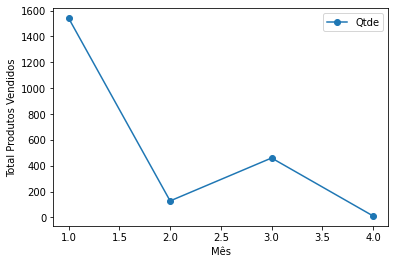

In [66]:
#Total de produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o") #marker é o tipo de marcador que vai aparecer no gráfico, existem vários("v", "*")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

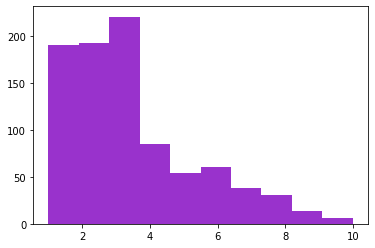

In [71]:
#Histograma
plt.hist(df["Qtde"], color="darkorchid")

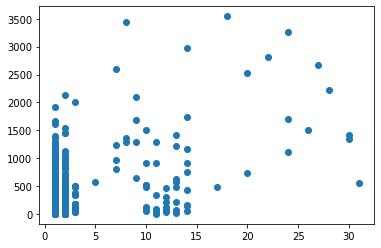

In [72]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

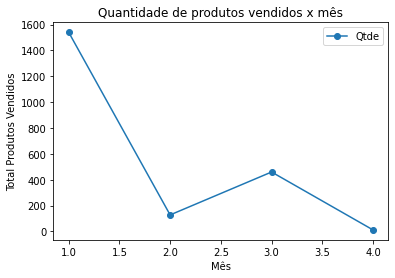

In [73]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();
plt.savefig("grafico QTDE x MES.png")